<a href="https://colab.research.google.com/github/Sunil17120/Natural-language-processing-/blob/main/CNNcifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

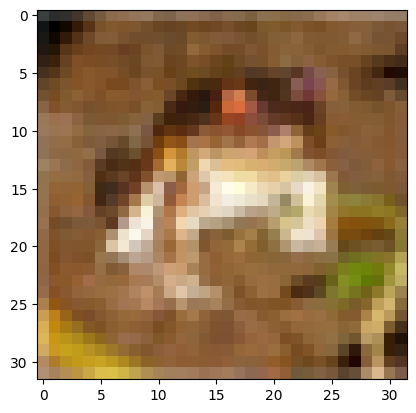

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
y_train[0] # frog

array([6], dtype=uint8)

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3617 - loss: 1.7243 - val_accuracy: 0.5758 - val_loss: 1.1937
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6147 - loss: 1.0865 - val_accuracy: 0.6540 - val_loss: 0.9826
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6802 - loss: 0.9092 - val_accuracy: 0.6762 - val_loss: 0.9253
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7258 - loss: 0.7866 - val_accuracy: 0.6959 - val_loss: 0.8931
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7679 - loss: 0.6679 - val_accuracy: 0.7127 - val_loss: 0.8437


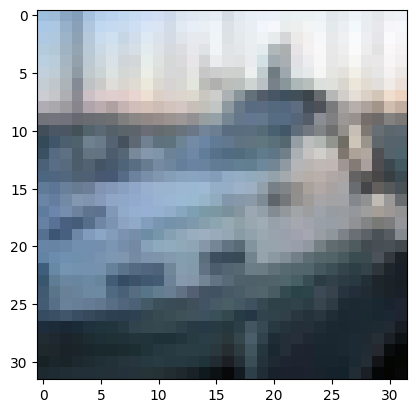

In [ ]:
test_image = x_test[2]
plt.imshow(test_image)
plt.show()

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
label_to_name = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

label = np.argmax(predictions[1])
print("Predicted Label:", label_to_name[label])

Predicted Label: ship


In [ ]:
accuracy_score(y_test, model.predict(x_test).argmax(axis=1))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.7127